In [ ]:
!pip install pysus
!pip install pandas

In [77]:
import pandas as pd 
import seaborn as sb
from pysus.online_data.SIH import download

In [30]:
# variaveis que usarei para analise ( apenas para uma visualização melhor do df )
vars = ['N_AIH','IDADE','SEXO','UF_ZI','NUM_FILHOS','INSTRU','MORTE','CID_MORTE','DIAS_PERM','DIAG_PRINC','DIAG_SECUN','DT_INTER','ANO_CMPT','MES_CMPT','MARCA_UTI','UTI_MES_TO','INFEHOPS']

meses = [1,2,3,4,5,6,7,8,9,10,11,12]
estado = 'es'
anos = [2019,2020,2021]
aux={}

In [41]:
# faz o download dos dados
for ano in anos:
  for mes in meses:
      aux[mes, ano] = pd.read_parquet(download(estado, ano, mes))
      print(f"O Arquivo do Mês {mes} do Ano {ano} do Estado do {estado.upper()} foi Baixado!")

O Arquivo do Mês 1 do Ano 2019 do Estado do ES foi Baixado!
O Arquivo do Mês 2 do Ano 2019 do Estado do ES foi Baixado!
O Arquivo do Mês 3 do Ano 2019 do Estado do ES foi Baixado!
O Arquivo do Mês 4 do Ano 2019 do Estado do ES foi Baixado!
O Arquivo do Mês 5 do Ano 2019 do Estado do ES foi Baixado!
O Arquivo do Mês 6 do Ano 2019 do Estado do ES foi Baixado!
O Arquivo do Mês 7 do Ano 2019 do Estado do ES foi Baixado!
O Arquivo do Mês 8 do Ano 2019 do Estado do ES foi Baixado!
O Arquivo do Mês 9 do Ano 2019 do Estado do ES foi Baixado!
O Arquivo do Mês 10 do Ano 2019 do Estado do ES foi Baixado!
O Arquivo do Mês 11 do Ano 2019 do Estado do ES foi Baixado!
O Arquivo do Mês 12 do Ano 2019 do Estado do ES foi Baixado!
O Arquivo do Mês 1 do Ano 2020 do Estado do ES foi Baixado!
O Arquivo do Mês 2 do Ano 2020 do Estado do ES foi Baixado!
O Arquivo do Mês 3 do Ano 2020 do Estado do ES foi Baixado!
O Arquivo do Mês 4 do Ano 2020 do Estado do ES foi Baixado!
O Arquivo do Mês 5 do Ano 2020 do Est

In [42]:
# concatena o dicionario em um DataFrame
sih_es = pd.concat({k:pd.DataFrame.from_dict(v) for k, v in aux.items()}, axis=0).reset_index()
sih_es.shape

(737395, 116)

In [43]:
# visualização da tabela
sih_es

,level_0,level_1,level_2,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,1,2019,0,320000,2019,01,01,27080605002482,3219101242050,1,...,,1,0,0,0,0,0,0,0,0
1,1,2019,1,320000,2019,01,01,27080605002482,3219101242797,1,...,,1,0,0,0,0,0,0,0,0
2,1,2019,2,320000,2019,01,01,27080605002482,3219101264346,1,...,,1,0,0,0,0,0,0,0,0
3,1,2019,3,320000,2019,01,01,27080605002482,3219101264368,1,...,,1,0,0,0,0,0,0,0,0
4,1,2019,4,320000,2019,01,01,27080605002482,3219101264379,1,...,,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737390,12,2021,20318,320520,2021,12,01,27165554000448,3221101206708,1,...,,0,0,0,0,0,0,0,0,0
737391,12,2021,20319,320520,2021,12,01,27165554000448,3221101206741,1,...,,0,0,0,0,0,0,0,0,0
737392,12,2021,20320,320520,2021,12,01,27165554000448,3221101206752,1,...,,0,0,0,0,0,0,0,0,0
737393,12,2021,20321,320520,2021,12,01,27165554000448,3221101206763,1,...,,0,0,0,0,0,0,0,0,0


In [44]:
# atribuindo as 3 primeiras colunas nomes
sih_es = sih_es.rename(columns={'level_0':'MES', 'level_1':'ANO'})
sih_es.shape

(737395, 116)

In [45]:
# filtra para ter somente as cids de código que começa com F
sih_es = sih_es[sih_es['DIAG_PRINC'].str.contains('F')]
sih_es.shape

(11722, 116)

In [46]:
#visualização da tabela pós filtração
sih_es

,MES,ANO,level_2,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
484,1,2019,484,320000,2019,01,05,27080605000862,3218102544173,5,...,,0,0,0,0,0,0,0,0,0
485,1,2019,485,320000,2019,01,05,27080605000862,3218102544206,5,...,,0,0,0,0,0,0,0,0,0
486,1,2019,486,320000,2019,01,05,27080605000862,3218102544217,5,...,,0,0,0,0,0,0,0,0,0
507,1,2019,507,320000,2019,01,05,27080605000862,3218102602220,1,...,,0,0,0,0,0,0,0,0,0
508,1,2019,508,320000,2019,01,05,27080605000862,3218102602220,5,...,,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737155,12,2021,20083,320506,2021,12,03,27443803000177,3221101181474,1,...,,0,0,0,0,0,0,0,0,0
737168,12,2021,20096,320506,2021,12,03,27443803000177,3221101180540,1,...,,0,0,0,0,0,0,0,0,0
737241,12,2021,20169,320506,2021,12,03,27443803000177,3221101181694,1,...,,0,0,0,0,0,0,0,0,0
737249,12,2021,20177,320506,2021,12,03,27443803000177,3221101181705,1,...,,0,0,0,0,0,0,0,0,0


In [ ]:
# visualizaçao das variaveis que não possuem nenhum valor
# sih_es['NUM_FILHOS'].unique(), sih_es['INSTRU'].unique(), sih_es['CID_MORTE'].unique(), sih_es['DIAG_SECUN'].unique()

In [ ]:
# excluindo variaveis que não possuem valores 
# sih_es.drop(['NUM_FILHOS', 'INSTRU', 'CID_MORTE','DIAG_SECUN'], axis=1, inplace=True)

In [47]:
# filtra as colunas que eu desejo
sih_es = sih_es.filter(vars)
sih_es.shape

(11722, 16)

In [67]:
# trocando os sexos
sexo={'1':'Masculino','3':'Feminino'}
sih_es['SEXO'] = sih_es['SEXO'].replace(sexo)

In [68]:
sih_es

,N_AIH,IDADE,SEXO,UF_ZI,NUM_FILHOS,INSTRU,MORTE,CID_MORTE,DIAS_PERM,DIAG_PRINC,DIAG_SECUN,DT_INTER,ANO_CMPT,MES_CMPT,MARCA_UTI,UTI_MES_TO
484,3218102544173,34,Masculino,320000,0,0,0,0000,2,F200,0000,20181129,2019,01,00,0
485,3218102544206,66,Masculino,320000,0,0,0,0000,2,F314,0000,20181127,2019,01,00,0
486,3218102544217,48,Masculino,320000,0,0,0,0000,2,F200,0000,20181126,2019,01,00,0
507,3218102602220,53,Masculino,320000,0,0,0,0000,21,F320,0000,20181210,2019,01,00,0
508,3218102602220,53,Masculino,320000,0,0,0,0000,28,F320,0000,20181210,2019,01,00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737155,3221101181474,35,Feminino,320506,0,0,0,0000,11,F190,0000,20211216,2021,12,00,0
737168,3221101180540,58,Masculino,320506,0,0,0,0000,7,F100,0000,20211203,2021,12,00,0
737241,3221101181694,69,Masculino,320506,0,0,0,0000,13,F102,0000,20211216,2021,12,00,0
737249,3221101181705,34,Masculino,320506,0,0,0,0000,12,F142,0000,20211217,2021,12,00,0


In [72]:
# descobrindo se possui valores NaN
sih_es.isnull().sum()

N_AIH         0
IDADE         0
SEXO          0
UF_ZI         0
NUM_FILHOS    0
INSTRU        0
MORTE         0
CID_MORTE     0
DIAS_PERM     0
DIAG_PRINC    0
DIAG_SECUN    0
DT_INTER      0
ANO_CMPT      0
MES_CMPT      0
MARCA_UTI     0
UTI_MES_TO    0
dtype: int64

<Axes: xlabel='SEXO'>

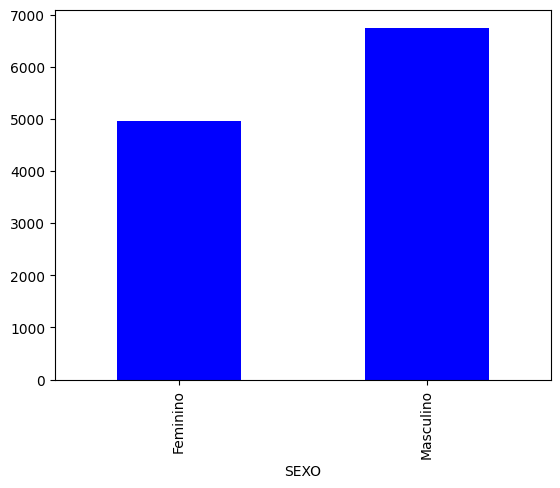

In [73]:
# grafico de barras dos sexos dos pacientes
grupo_sexo = sih_es.groupby(['SEXO']).size()
grupo_sexo.plot.bar(color='blue')

In [75]:
# grafico de barras das cids 
grupo_cids = sih_es.groupby(['DIAG_PRINC']).size()
grupo_cids

DIAG_PRINC
F000    17
F001     3
F002    10
F009    11
F018     1
        ..
F949     1
F952     1
F988     1
F989     1
F99     12
Length: 261, dtype: int64

AttributeError: ignored

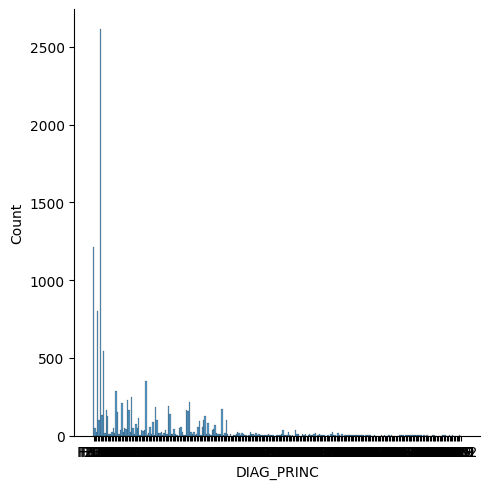

In [80]:
sb.displot(sih_es['DIAG_PRINC']).set_title('CIDS')